<a href="https://colab.research.google.com/github/SyedAfeefAhmed/TSF-Task-1/blob/main/Task_1_(Linear_Reg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Spark Foundation**
**Data Science and Business Analytics**
#####**Name - Syed Afeef Ahmed**
**Task 1** **-** Predict the percentage of a student based on number of study hours.
#####**Dataset** **-** http://bit.ly/w-data
**Outcome (To Predict)** **-**  What will be the predicted score if a student studies for 9.25 hrs/day?

##**Step 1 -** Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

##**Step 2 -** Importing and checking Dataset

In [2]:
link = "http://bit.ly/w-data"
mydata = pd.read_csv(link)
mydata.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
mydata.isnull().sum()

Hours     0
Scores    0
dtype: int64

##**Step 3 -** Visualizing the dataset

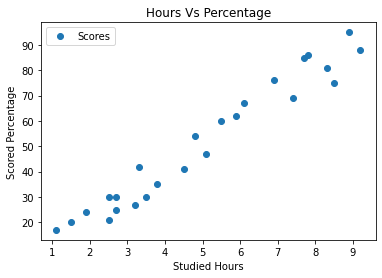

In [5]:
#Plotting the values in the form of graph
mydata.plot(x='Hours', y='Scores', style='o')
plt.title('Hours Vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scored Percentage')
plt.show()

**From the above graph we can see that scored percentage increases when hours of study increases respectively**

##**Step 4 -** Splitting x and y variables

In [6]:
X=mydata.iloc[:, :-1].values
y=mydata.iloc[:, 1].values

##**Step 5 -** Perform Train and Test split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.2, random_state = 0)

##**Step 6 -** Building a model

In [8]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

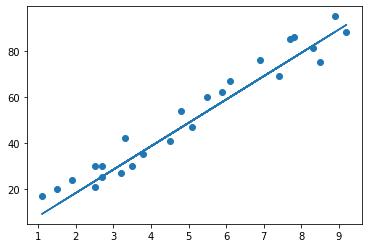

In [9]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

##**Step 7 -** Prediction

In [10]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]]


##**Step 8 -** Comparison between Actual & Predicted values

In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,13.196114
1,27,30.432659
2,69,73.017065
3,30,23.335259
4,62,57.808349
5,35,36.516146
6,24,17.251772
7,86,77.072722
8,76,67.947493
9,17,9.140457


In [12]:
f_com=pd.DataFrame({"Actual":Y_test,"Machine_predicted":y_pred})
f_com

,Actual,Machine_predicted
0,20,13.196114
1,27,30.432659
2,69,73.017065
3,30,23.335259
4,62,57.808349
5,35,36.516146
6,24,17.251772
7,86,77.072722
8,76,67.947493
9,17,9.140457


##**Step 9 -** Residual - Error difference between Actual and Predicted values

In [13]:
Res=y_pred-Y_test
Res

array([ -6.80388553,   3.43265949,   4.01706485,  -6.6647414 ,
        -4.19165135,   1.51614597,  -6.74822788,  -8.9272775 ,
        -8.05250722,  -7.85954319,   2.69703334,  -8.94119191,
       -10.5534261 ,   1.14229457,   3.26752428,  -7.16382253,
         3.47440273,   0.36308742,  -6.247309  ,  -4.63691258])

##**Step 10 -** Visualization between Actual and Predicted

In [14]:
com_g=f_com.head(23)

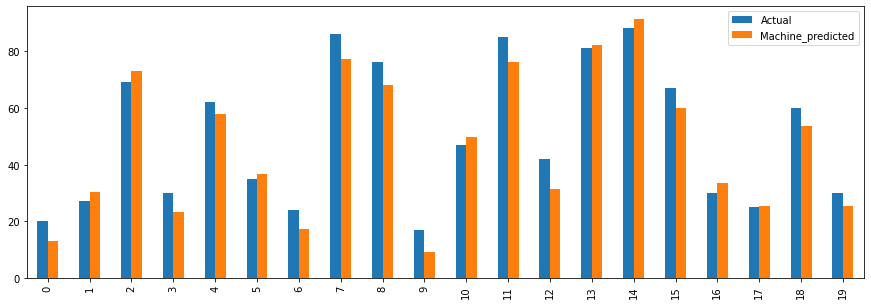

In [15]:
com_g.plot(kind="bar",figsize=(15,5));

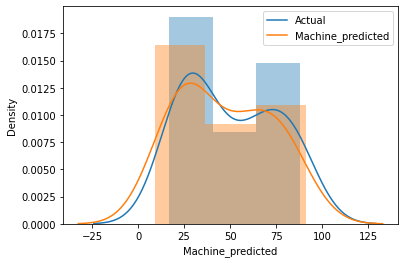

In [16]:
sb.distplot(f_com["Actual"])
sb.distplot(f_com["Machine_predicted"])
plt.legend(["Actual","Machine_predicted"])

##**Step 11 -** To calculate the required outcome

In [17]:
hours = 9.25
hours = np.reshape(hours,(1,-1))
my_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(my_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 91.77448149120502


##**Step 12 -** Model Evaluation
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 5.335035442373328
